In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v2.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,id,type,role,bandwidth,total_used_bandwidth,traffic_history,ports,duration,power_per_port,low_power,high_power,is_active,Unnamed: 14
0,0,Datacenter_1,0,switch,access switch,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"449,True,113,0,1000,4000.0,1000.0-1000.0-1000....",449.0,15.4,70,71,True,NaN
1,0,Datacenter_1,1,switch,access switch,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"450,True,113,1,1000,4000.0,1000.0-1000.0-1000....",449.0,15.4,70,71,True,NaN
2,0,Datacenter_1,2,switch,access switch,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"451,True,113,2,1000,4000.0,1000.0-1000.0-1000....",449.0,15.4,70,71,True,NaN
3,0,Datacenter_1,3,switch,access switch,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"452,True,113,3,1000,4000.0,1000.0-1000.0-1000....",449.0,15.4,70,71,True,NaN
4,0,Datacenter_1,4,switch,access switch,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"453,True,114,4,1000,4000.0,1000.0-1000.0-1000....",449.0,15.4,70,71,True,NaN


Datacenter_1 transmits 2245.0 of data through the network.


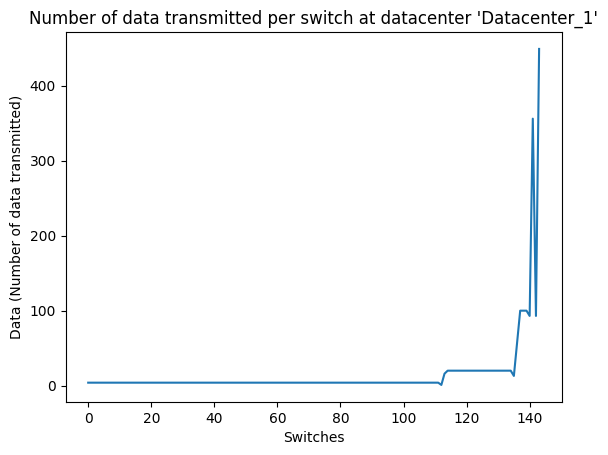

Datacenter_2 transmits 2170.0 of data through the network.


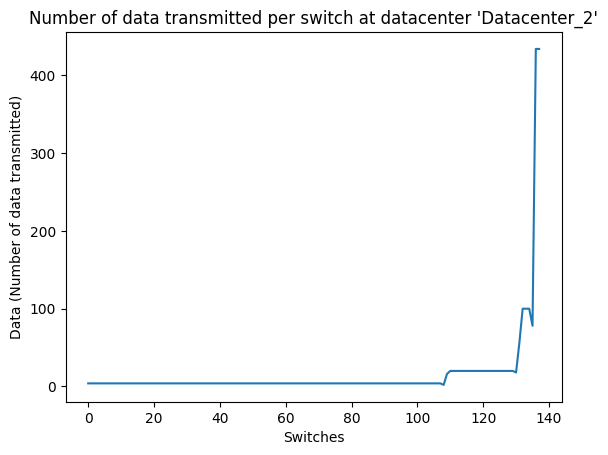

Datacenter_3 transmits 1795.0 of data through the network.


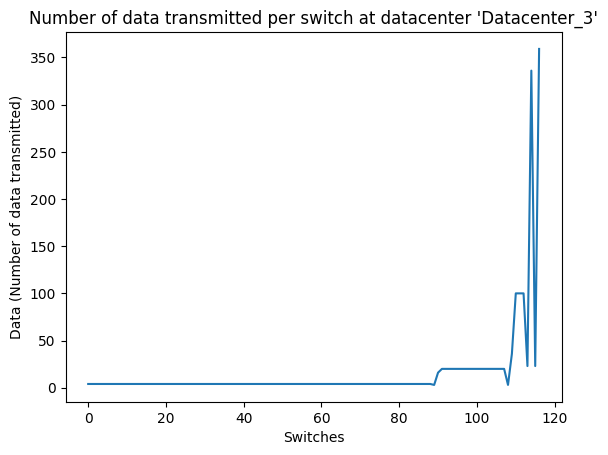

Datacenter_4 transmits 2245.0 of data through the network.


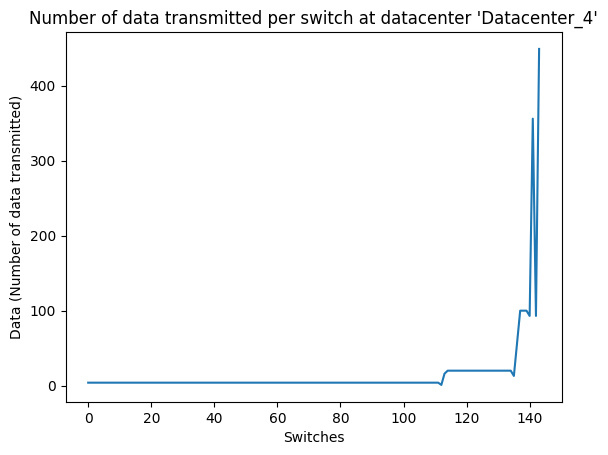

Datacenter_1 transmits 3780.0 of data through the network.


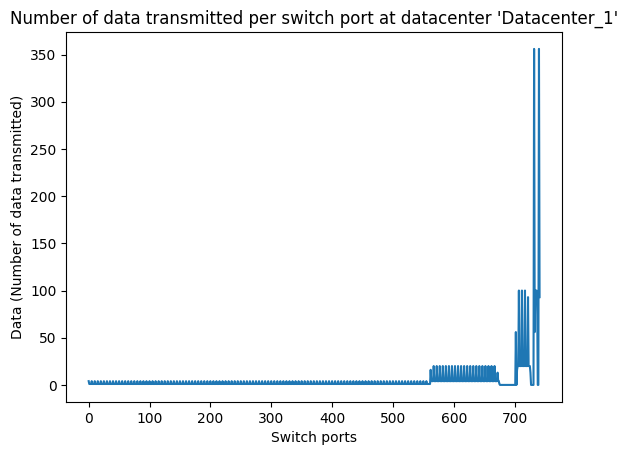

Datacenter_2 transmits 3686.0 of data through the network.


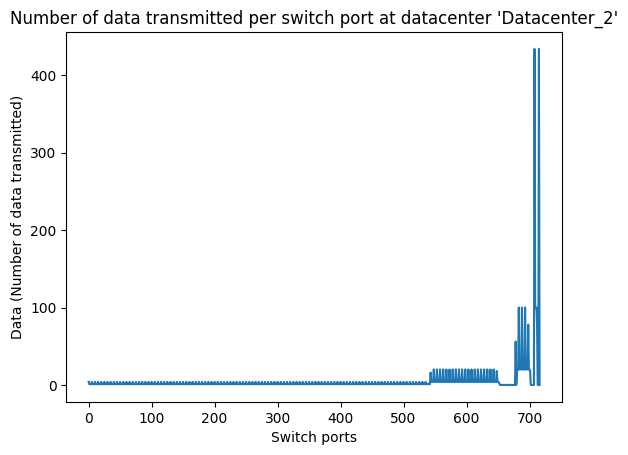

Datacenter_3 transmits 3057.0 of data through the network.


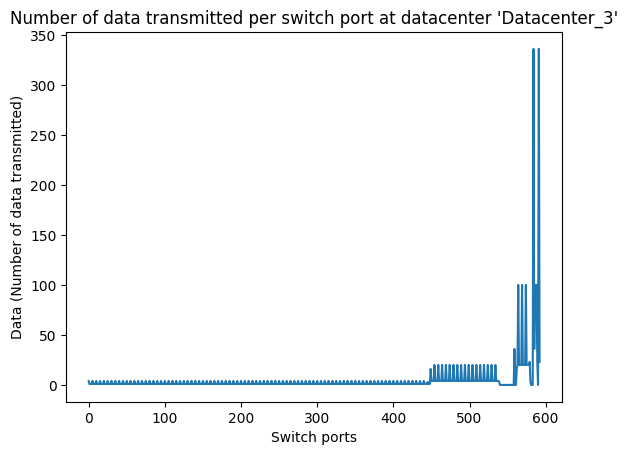

Datacenter_4 transmits 3780.0 of data through the network.


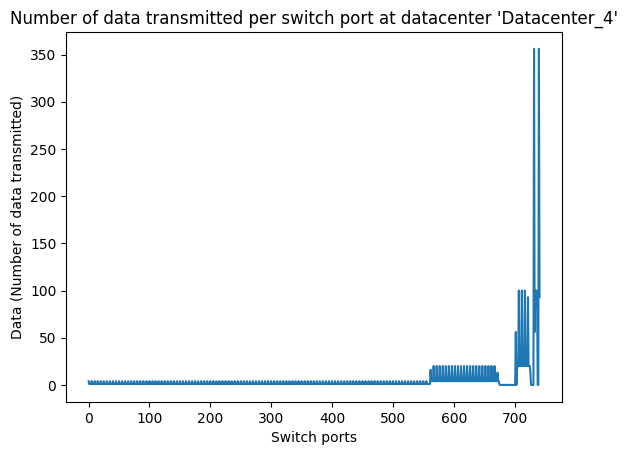

Cloud provider transmits 8455.0 of data through its network.


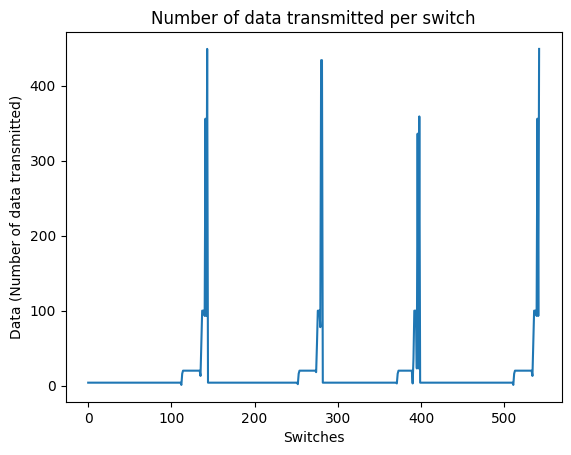

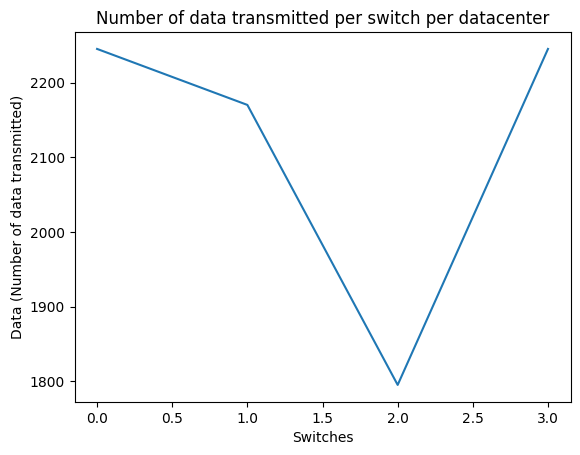

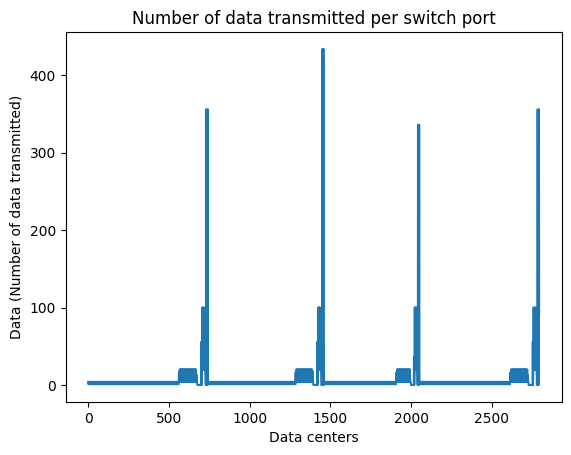

In [13]:
labels = np.unique(dataset['datacenter_name'])

# Switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        # print(sample['traffic_history'].split(":"))
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmits {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.plot(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per switch")
    plt.xlabel("Switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per switch at datacenter '{datacenter_name}'")
    plt.show()

# Switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[6].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per switch port")
    plt.xlabel("Switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per switch port at datacenter '{datacenter_name}'")
    plt.show()

# Switch
print(f"Cloud provider transmits {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per switch")
plt.xlabel("Switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per switch")
plt.show()

plt.plot(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per switch")
plt.xlabel("Switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per switch per datacenter")
plt.show()

# Switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per switch port")
plt.show()

#### Access switches

Datacenter_1 transmitts 449.0 of data through the network.


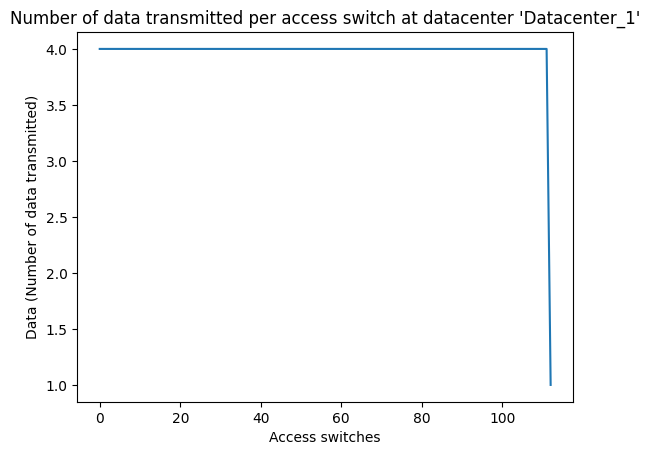

Datacenter_2 transmitts 434.0 of data through the network.


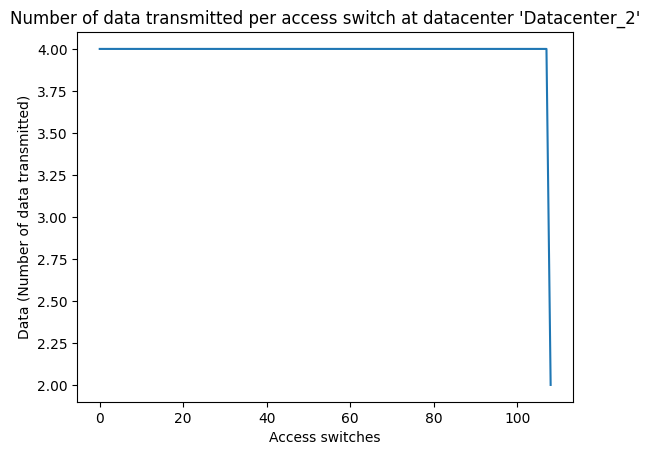

Datacenter_3 transmitts 359.0 of data through the network.


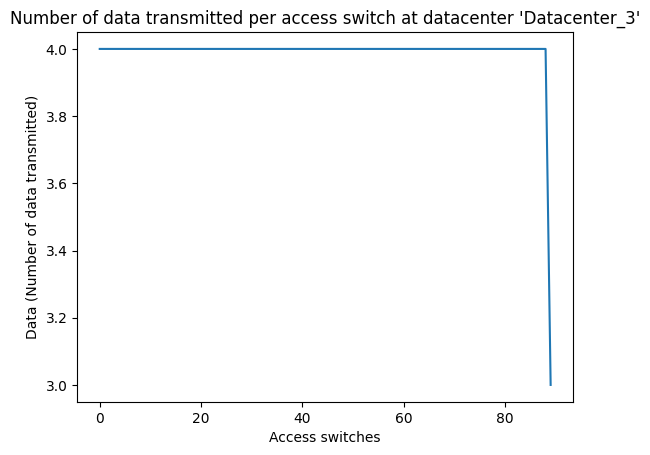

Datacenter_4 transmitts 449.0 of data through the network.


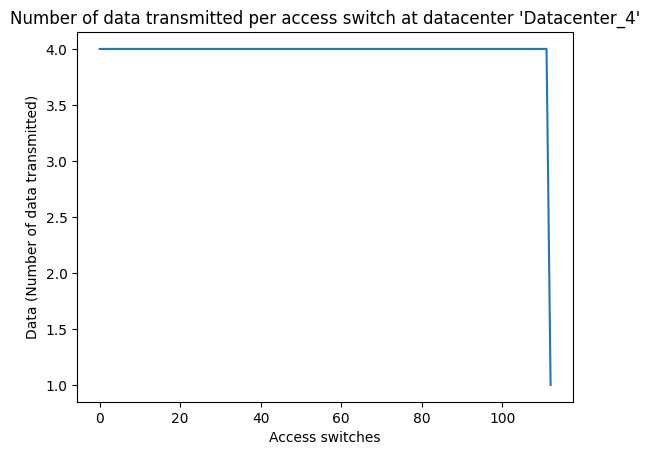

Datacenter_1 transmits 898.0 of data through the network.


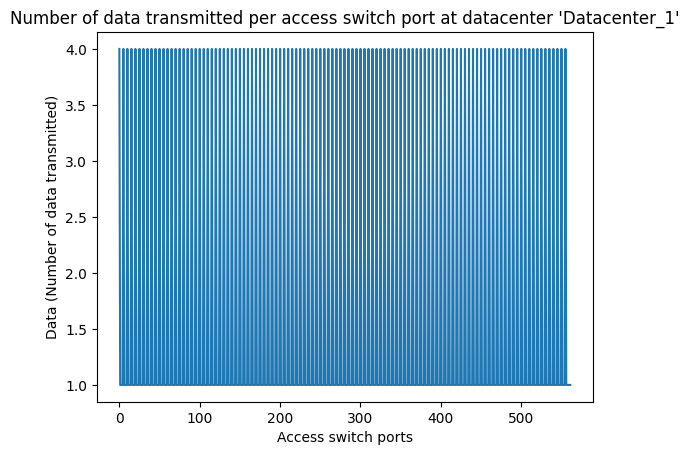

Datacenter_2 transmits 868.0 of data through the network.


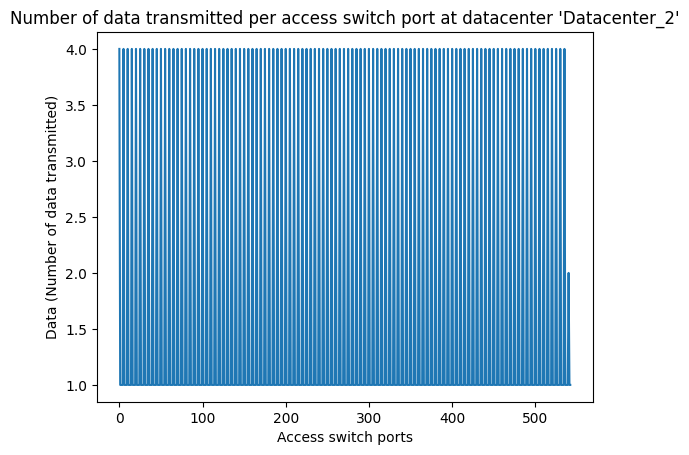

Datacenter_3 transmits 718.0 of data through the network.


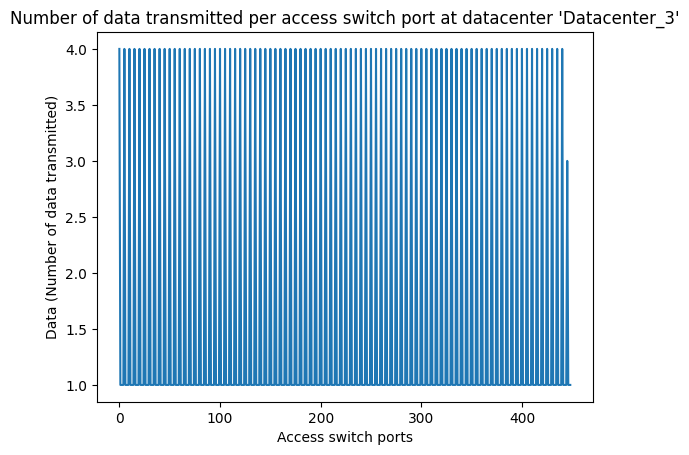

Datacenter_4 transmits 898.0 of data through the network.


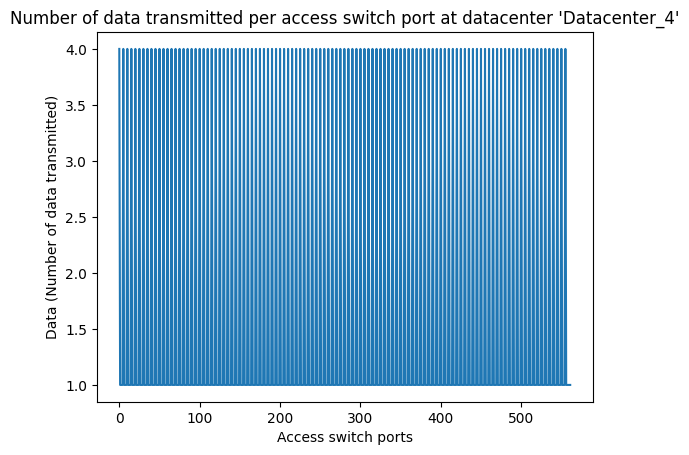

Cloud provider transmitts 1691.0 of data through its network.


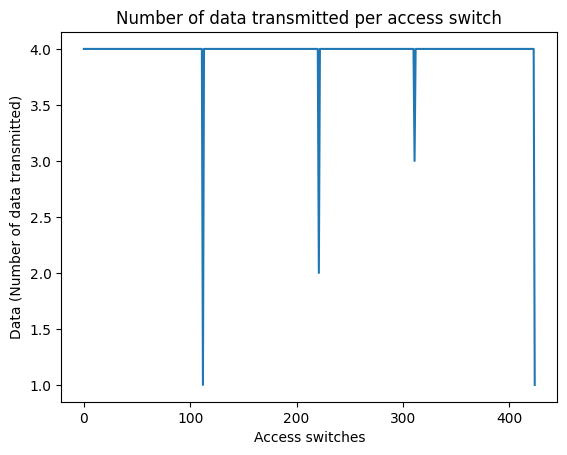

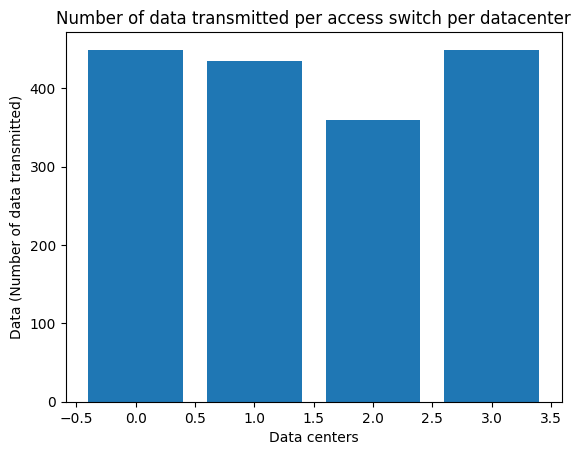

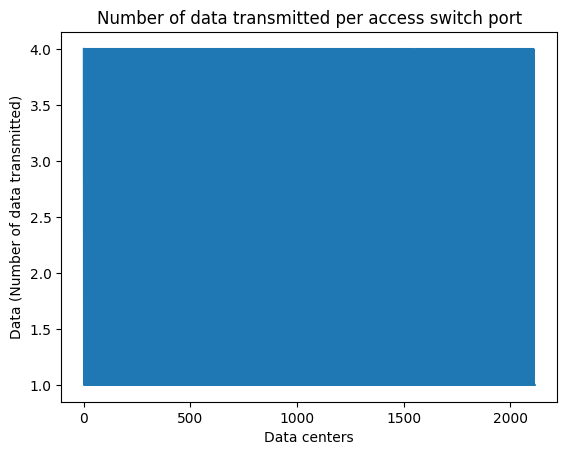

In [14]:
labels = np.unique(dataset['datacenter_name'])

# Access switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "access switch")].iterrows():
        # print(sample['traffic_history'].split(":"))
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmitts {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.plot(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per access switch")
    plt.xlabel("Access switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per access switch at datacenter '{datacenter_name}'")
    plt.show()

# Access switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "access switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[6].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per access switch port")
    plt.xlabel("Access switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per access switch port at datacenter '{datacenter_name}'")
    plt.show()

# Access switch
print(f"Cloud provider transmitts {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per access switch")
plt.xlabel("Access switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per access switch")
plt.show()

plt.bar(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per access switch")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per access switch per datacenter")
plt.show()

# Access switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per access switch port")
plt.show()

#### Distribution switches

Datacenter_1 transmitts 1347.0 of data through the network.


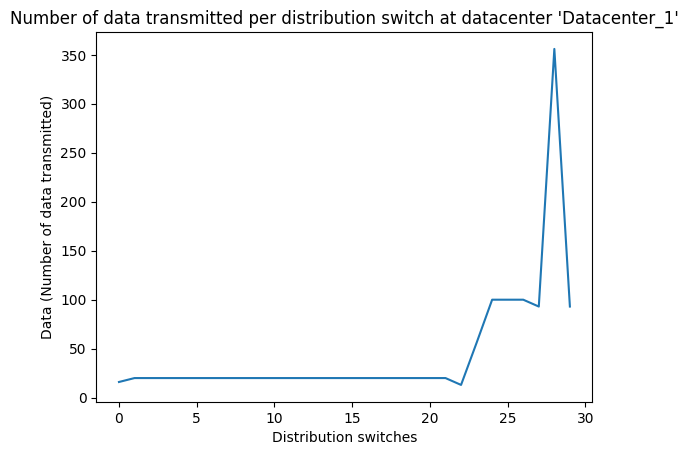

Datacenter_2 transmitts 1302.0 of data through the network.


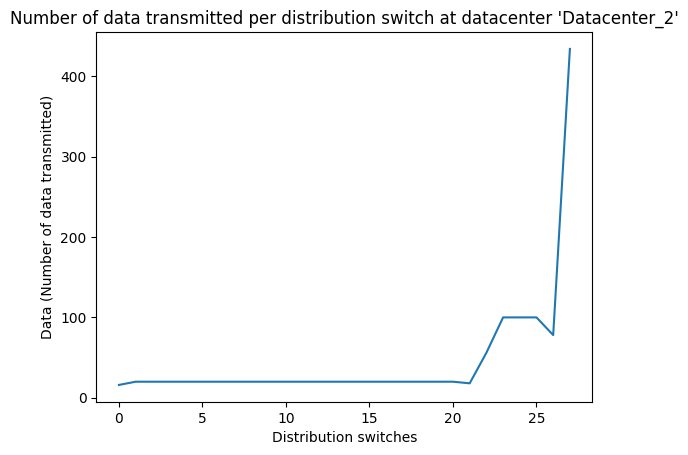

Datacenter_3 transmitts 1077.0 of data through the network.


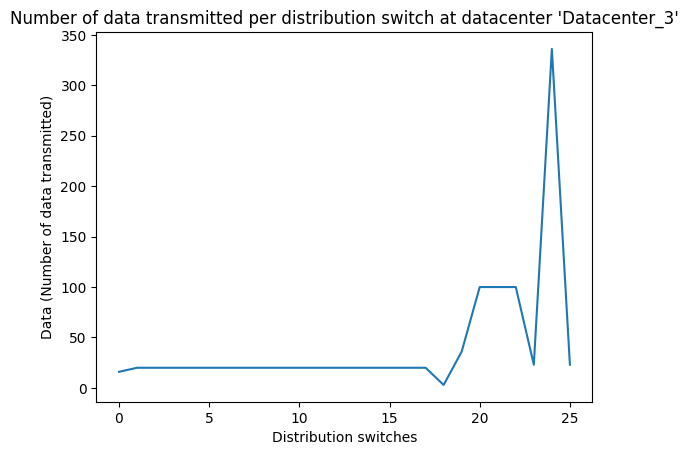

Datacenter_4 transmitts 1347.0 of data through the network.


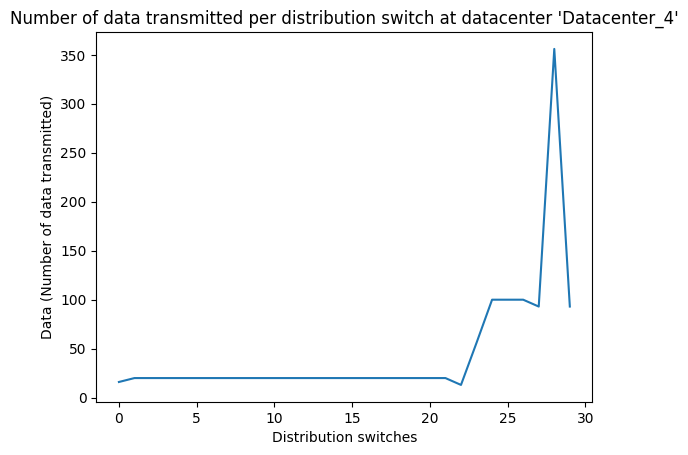

Datacenter_1 transmits 2433.0 of data through the network.


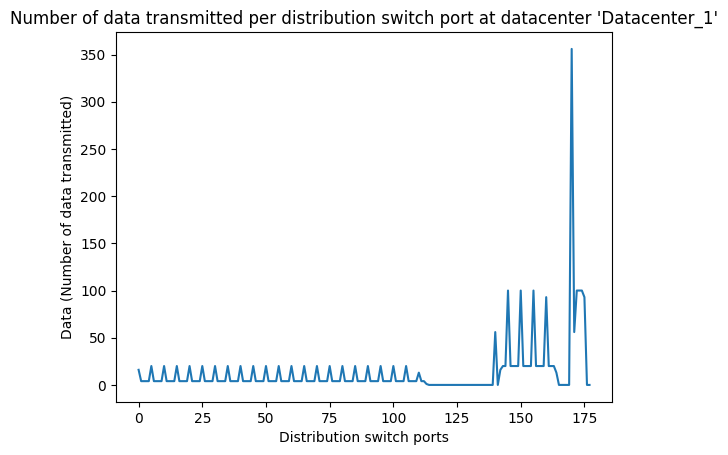

Datacenter_2 transmits 2384.0 of data through the network.


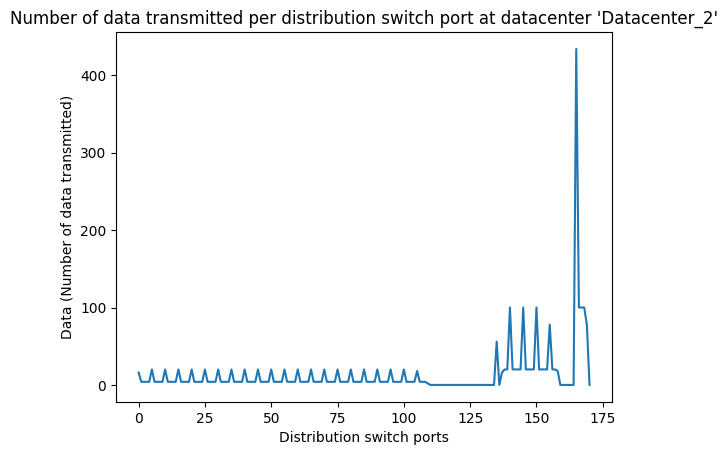

Datacenter_3 transmits 1980.0 of data through the network.


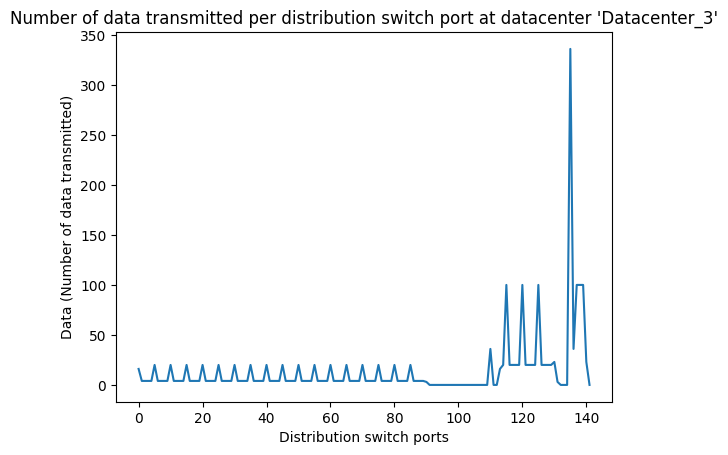

Datacenter_4 transmits 2433.0 of data through the network.


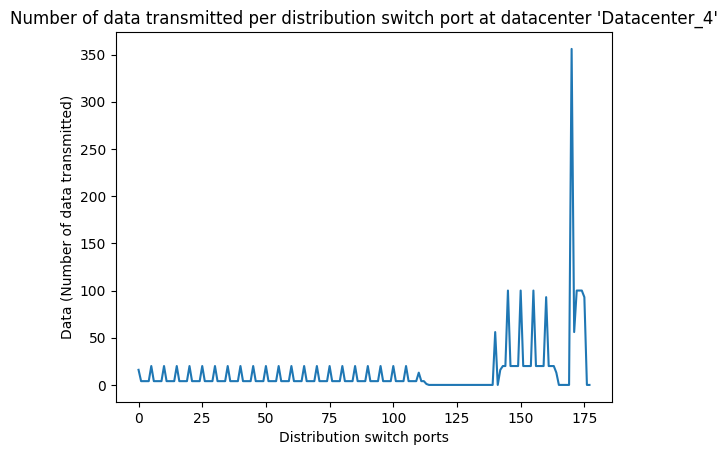

Cloud provider transmitts 5073.0 of data through its network.


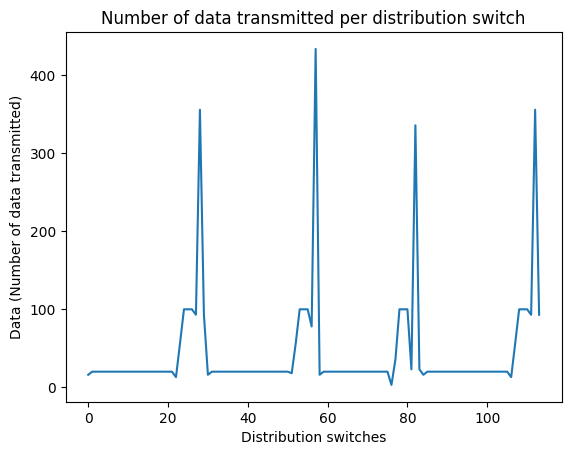

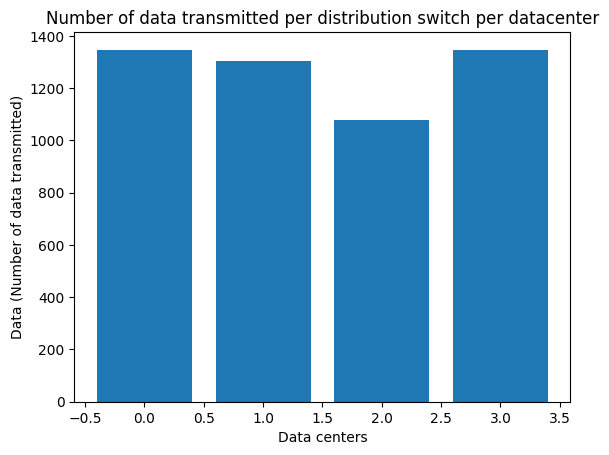

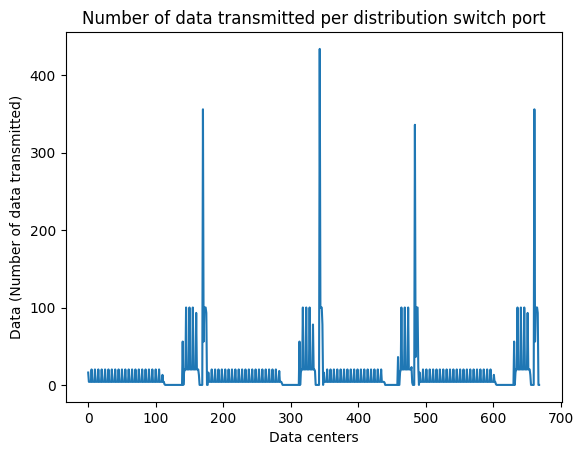

In [15]:
labels = np.unique(dataset['datacenter_name'])

# Distribution switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "distribution switch")].iterrows():
        # print(sample['traffic_history'].split(":"))
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmitts {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.plot(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per distribution switch")
    plt.xlabel("Distribution switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per distribution switch at datacenter '{datacenter_name}'")
    plt.show()

# Distribution switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "distribution switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[6].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per distribution switch port")
    plt.xlabel("Distribution switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per distribution switch port at datacenter '{datacenter_name}'")
    plt.show()

# Distribution switch
print(f"Cloud provider transmitts {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per distribution switch")
plt.xlabel("Distribution switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per distribution switch")
plt.show()

plt.bar(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per distribution switch")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per distribution switch per datacenter")
plt.show()

# Distribution switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per distribution switch port")
plt.show()

#### Core switches

Datacenter_1 transmitts 449.0 of data through the network.


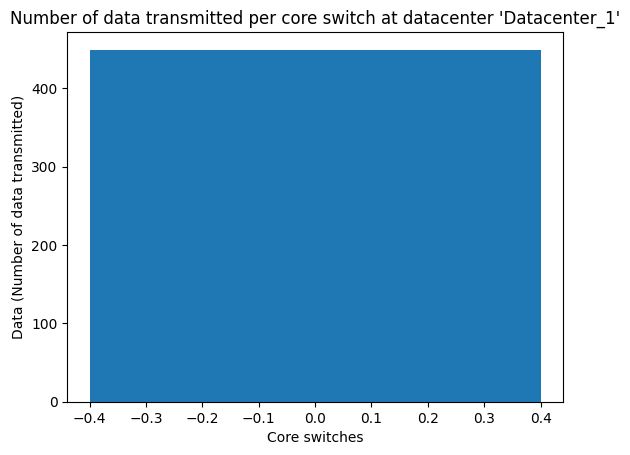

Datacenter_2 transmitts 434.0 of data through the network.


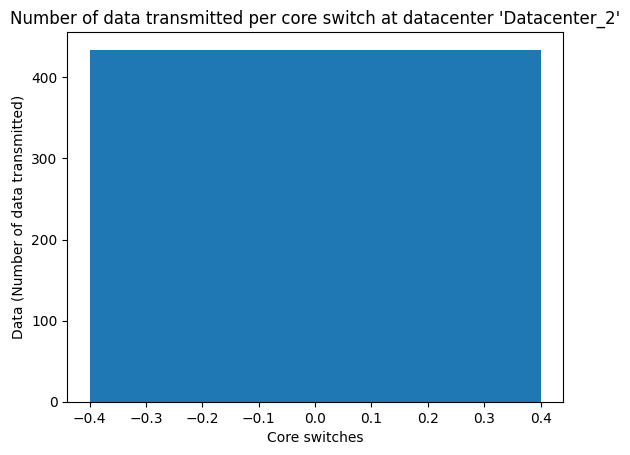

Datacenter_3 transmitts 359.0 of data through the network.


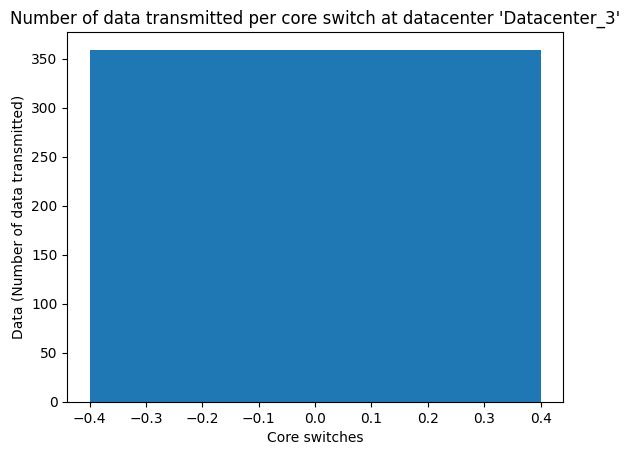

Datacenter_4 transmitts 449.0 of data through the network.


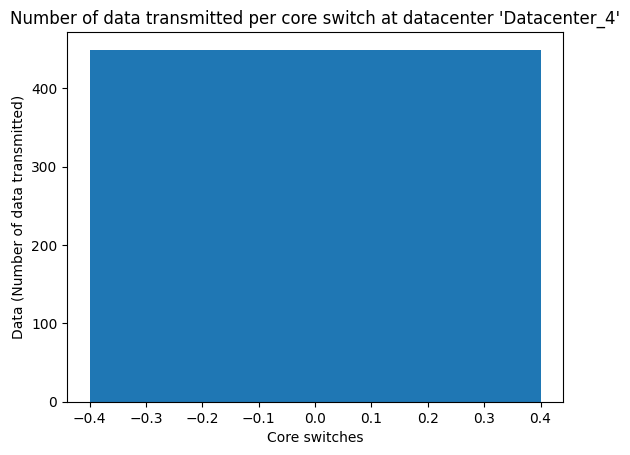

Datacenter_1 transmits 449.0 of data through the network.


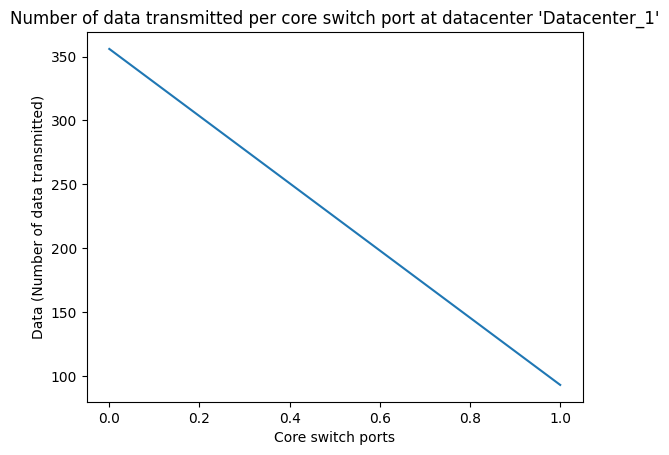

Datacenter_2 transmits 434.0 of data through the network.


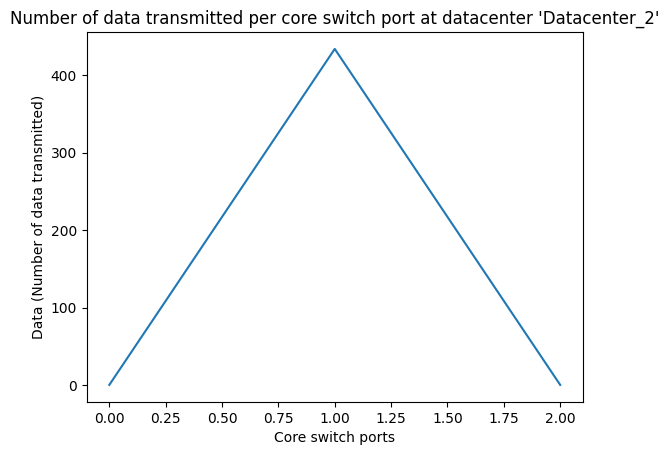

Datacenter_3 transmits 359.0 of data through the network.


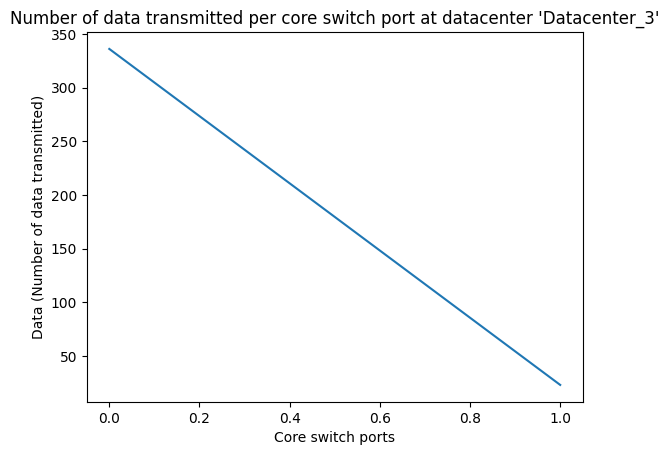

Datacenter_4 transmits 449.0 of data through the network.


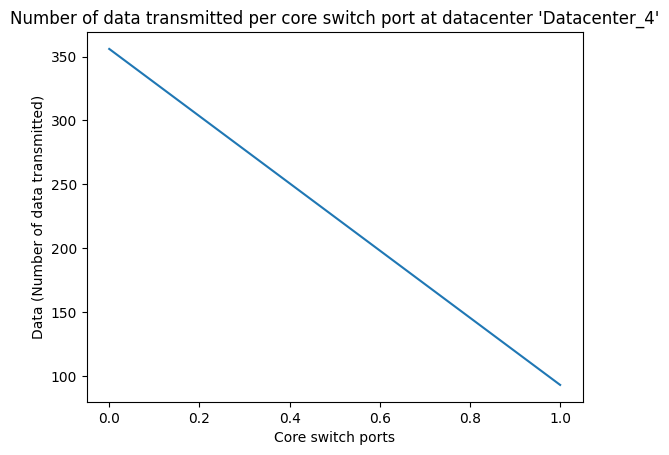

Cloud provider transmitts 1691.0 of data through its network.


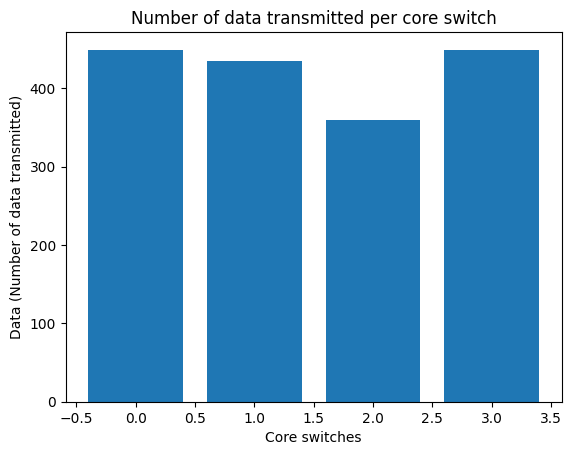

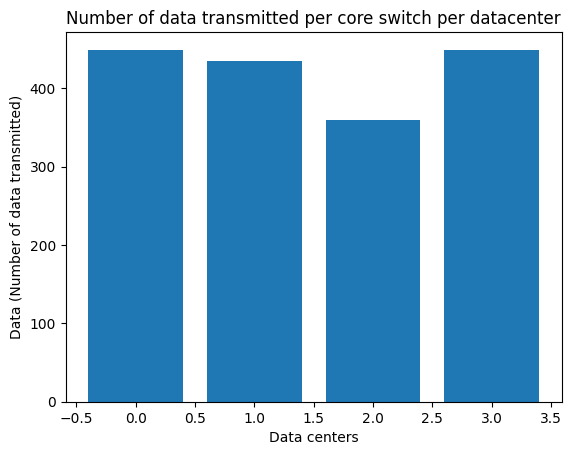

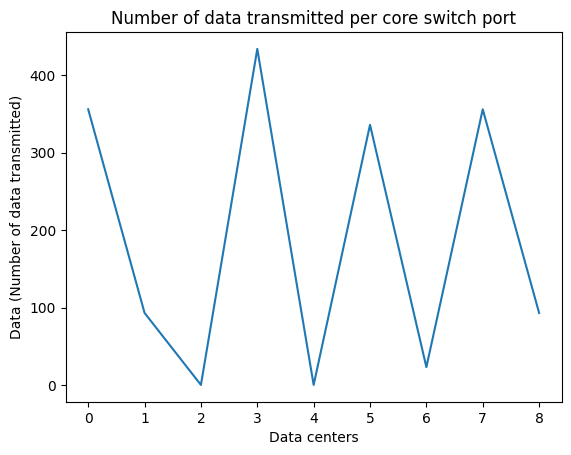

In [16]:
labels = np.unique(dataset['datacenter_name'])

# Core switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "core switch")].iterrows():
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmitts {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.bar(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per core switch")
    plt.xlabel("Core switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per core switch at datacenter '{datacenter_name}'")
    plt.show()

# Core switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "core switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[6].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per core switch port")
    plt.xlabel("Core switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per core switch port at datacenter '{datacenter_name}'")
    plt.show()

# Core switch
print(f"Cloud provider transmitts {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.bar(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per core switch")
plt.xlabel("Core switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per core switch")
plt.show()

plt.bar(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per core switch")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per core switch per datacenter")
plt.show()

# Core switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per core switch port")
plt.show()